<a href="https://colab.research.google.com/github/Sathvik-Srivathsan/Neural-Networks/blob/main/neural_netrowks_1_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This is just the example to show how forward and backward propagation works.

The scatter plot down is what we will use for the real implementation.

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

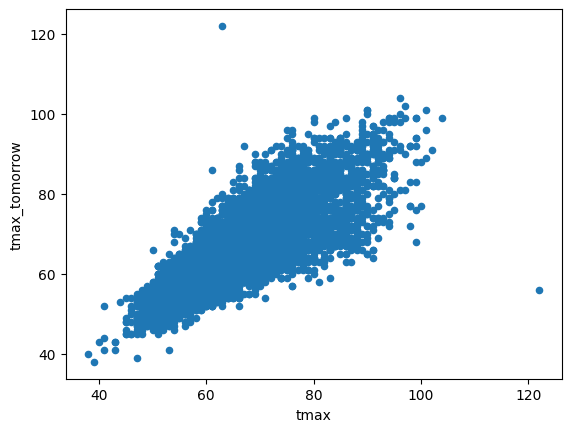

In [54]:
data = pd.read_csv("/content/clean_weather.csv", index_col=0)
data = data.ffill()
data.plot.scatter("tmax", "tmax_tomorrow")

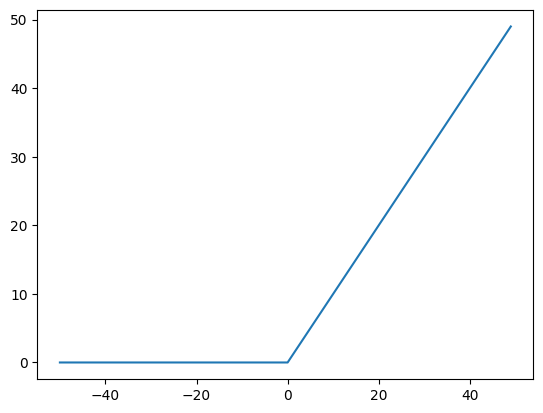

In [65]:
#@title ReLU Function
temps = np.arange(-50,50)

plt.plot(temps, np.maximum(0, temps))

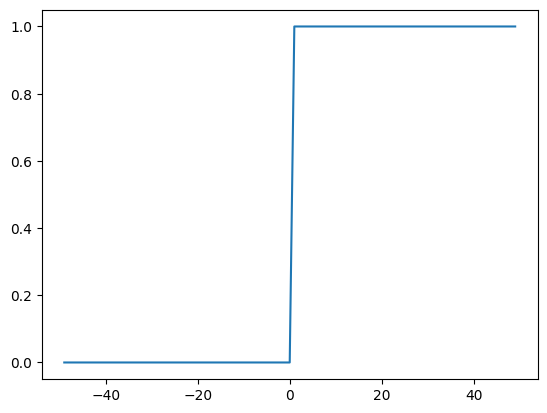

In [73]:
#Derivative of ReLU Function is 0 or 1
activation = np.maximum(0, temps)

# Plot the input temperatures against the derivative of relu (the slope)
# np.roll will shift the values to the right one place, so we subtract the previous value
plt.plot(temps[1:], activation[1:] - np.roll(activation, 1)[1:])

ReLU = Rectified Linear Unit

$$ReLU Function f(x) = \begin{cases} 0, & \text{if } x < 0, \\ x, & \text{otherwise}. \end{cases}$$

Derivative of ReLU function is 0 or 1

$$f'(x) = \begin{cases} 0, & \text{if } x < 0, \\ 1, & \text{if } x > 1. \end{cases}$$

Prediction $(\hat{y})$ = $w * x + b$

Here $x$ is the input, $w$ is the weight and $b$ is the bias

Loss = predicted $(\hat{y})$ value - actual $(y)$ value = $(\hat{y} - y)$

Mean Squared Error (MSE) = $\frac{1}{n} * ∑ ( ŷ - y) ^ 2$

Here "Loss" and "Error" are interchangable as words

Gradient = $\frac{2}{n} * ∑ ( ŷ - y)$

Gradient is the derivative of MSE

$\frac{d (x^2)}{dx}$ = $2x$

Layer 1 = $ReLU(x * w_{1} + b_{1})$

Lets take the output of layer 1 as $l_{1}$

Layer 2 $(l_{2}) = ReLU(l_{1} * w_{2} + b_{2})$

And so on...

Matrix Multiplication Reference:




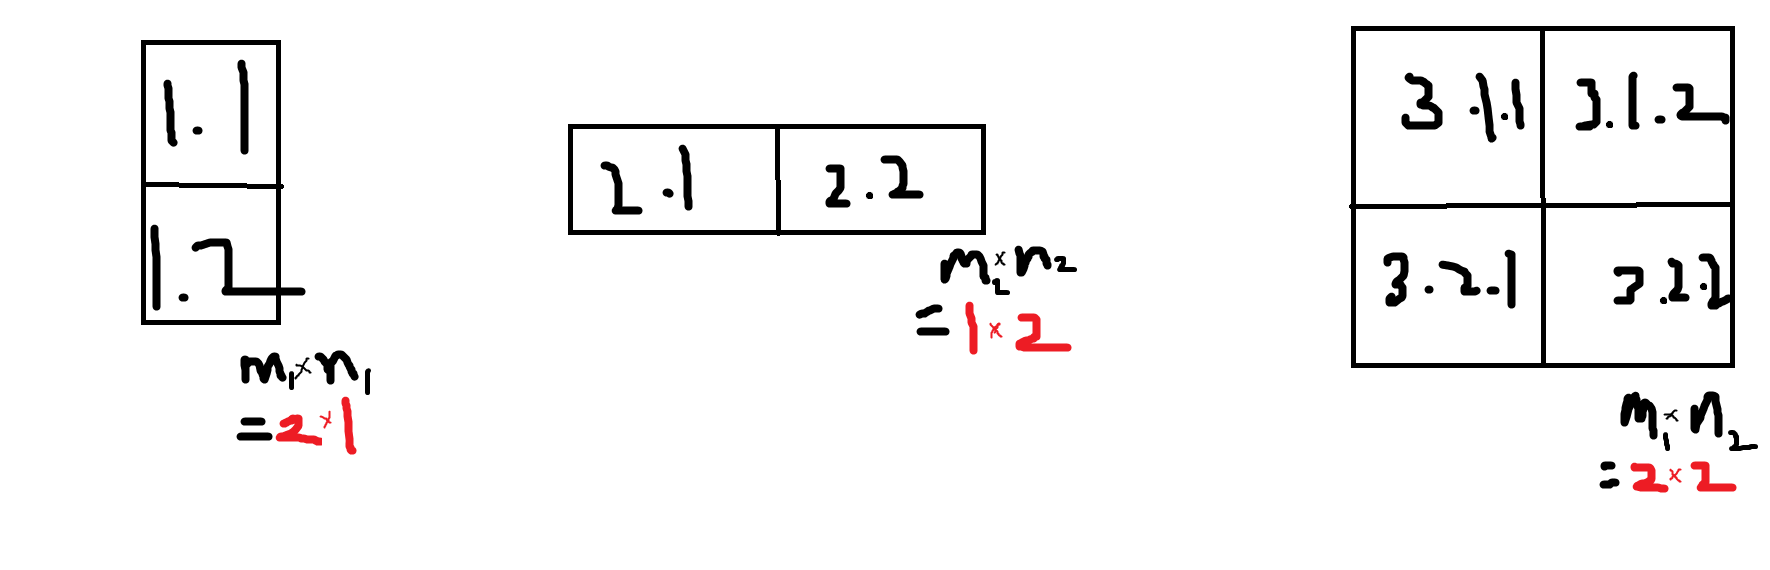

In [55]:
from IPython.display import Image

print("Matrix Multiplication Reference:\n\n")
Image('Matrix Mul.png', width = 1000)

In [56]:
#@title Forward Propagation:
#We are using only 2 layers
#Consider output of Layer 2 as final output

tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]])

#l1 = layer 1
#layer 1 weights 1x2
l1_weights = np.array([[.82, .1]])

#Layer 1 bias 1x2
l1_bias = np.array([[11.99, 10]])

#layer 1 output = x*w + b
l1_output = tmax @ l1_weights + l1_bias
print("Layer 1\n", l1_output)

print("\nAfter ReLU:")

#layer 1 activated is basically the FINAL output of layer 1 which is basically the prediction run thru ReLU = ReLU(x*w + b)
l1_activated = np.maximum(0, l1_output)
print(l1_activated)


l2_weights = np.array([
    [.5],
    [.2]
])

l2_bias = np.array([[5]])

l2_output = l1_activated @ l2_weights + l2_bias
print("\nLayer 2\n", l2_output)

print("\nAfter ReLU:")
output = np.maximum(0, l2_output)
print(output)

Layer 1
 [[77.59 18.  ]
 [85.79 19.  ]
 [93.99 20.  ]
 [-4.41  8.  ]
 [ 3.79  9.  ]]

After ReLU:
[[77.59 18.  ]
 [85.79 19.  ]
 [93.99 20.  ]
 [ 0.    8.  ]
 [ 3.79  9.  ]]

Layer 2
 [[47.395]
 [51.695]
 [55.995]
 [ 6.6  ]
 [ 8.695]]

After ReLU:
[[47.395]
 [51.695]
 [55.995]
 [ 6.6  ]
 [ 8.695]]


Forwards Propagation Reference:




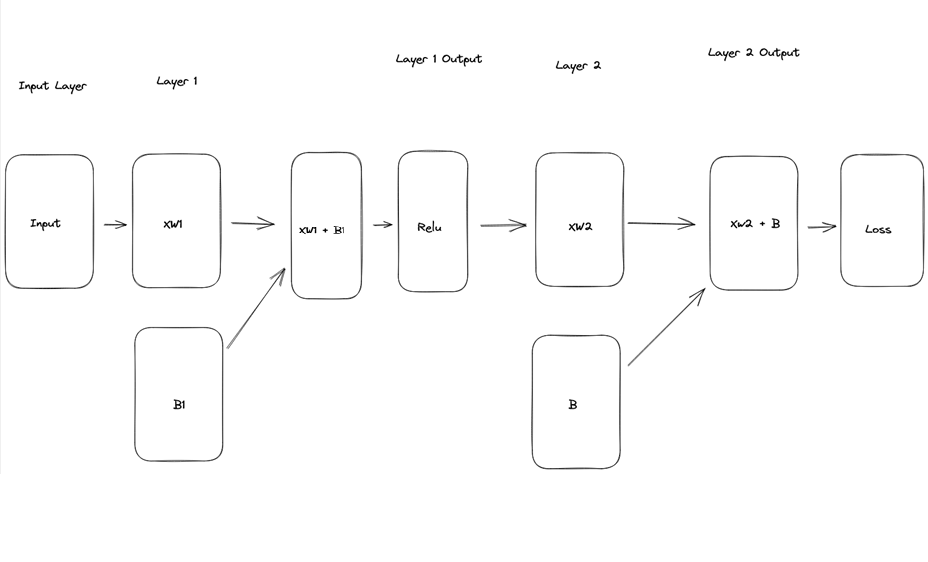

In [61]:
from IPython.display import Image

print("Forwards Propagation Reference:\n\n")
Image('Forward Propagation.png', width = 800, height = 350)

Backwards Propagation Reference:




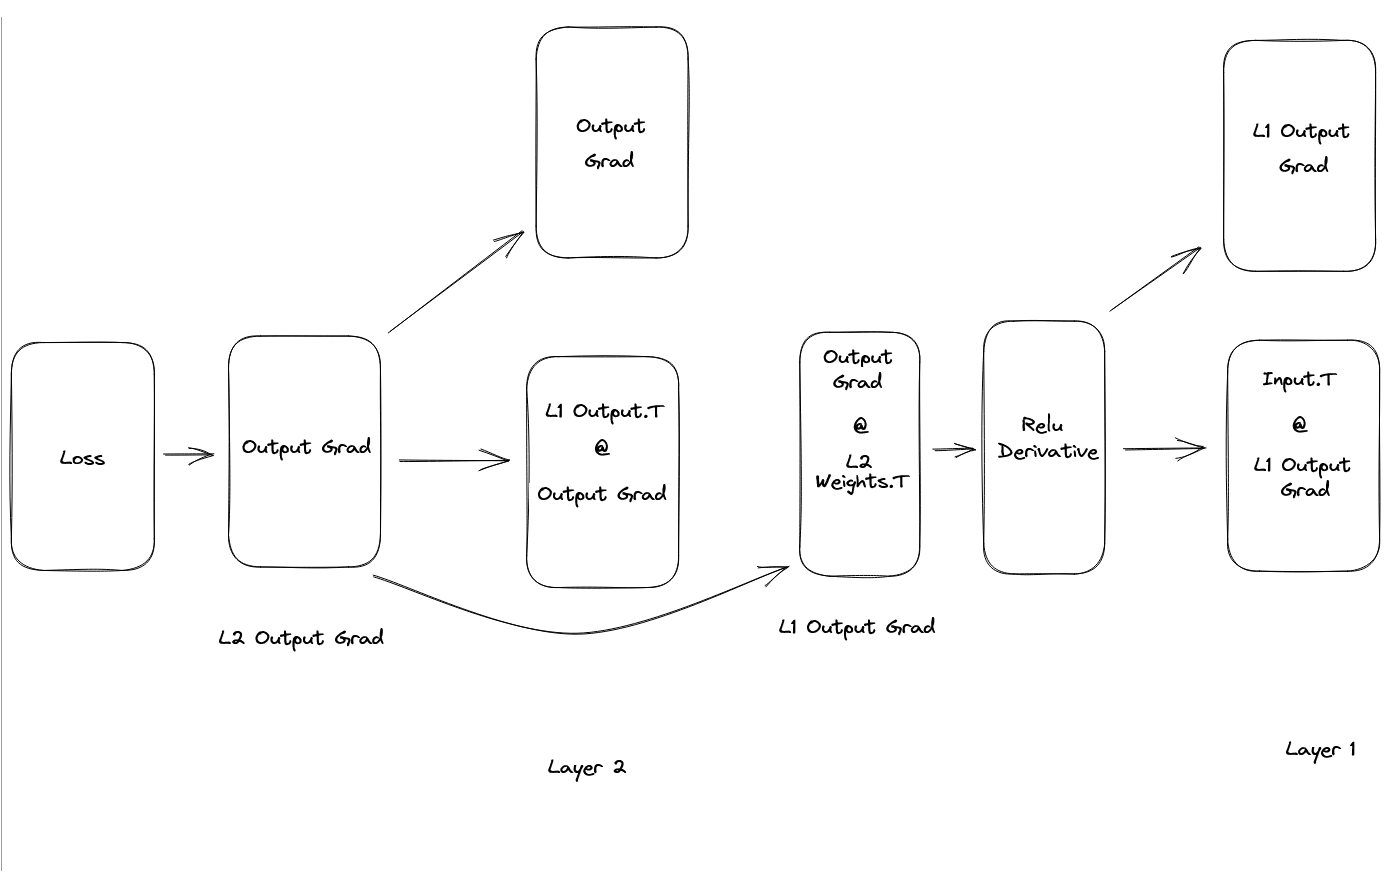

In [62]:
from IPython.display import Image

print("Backwards Propagation Reference:\n\n")
Image('Backward Propagation.png', width = 800, height = 350)

$L = X*W$

Ignore Bias since after partial derivative it will be 0 (and plus to simplify the eq)

First:

$$\frac{∂L}{∂W2}  => ∂LX$$

Then:
$$\frac{∂(\frac{∂L}{∂W2})}{∂XW2}  ==> \frac{∂(∂LX)}{∂XW2}$$

In [59]:
mse = lambda actual, predicted: (actual - predicted) ** 2

mse_grad = lambda actual, predicted: actual - predicted

print("MSE:\n", mse(tmax_tomorrow, output))
print("\nGradient/2:\n", mse_grad(tmax_tomorrow, output))

#in case u forgot what gradient is...
#its the loss (in disguise)

MSE:
 [[1267.716025]
 [1391.663025]
 [1521.390025]
 [ 817.96    ]
 [ 313.113025]]

Gradient/2:
 [[ 35.605]
 [ 37.305]
 [ 39.005]
 [-28.6  ]
 [-17.695]]


In [81]:
#@title Backward Propagation:

#now this is layer 2 output gradient which will play a role into updating/fine-tuning weight and bias of layer 2
output_gradient = mse_grad(tmax_tomorrow, output)

l2_w_gradient =  l1_activated.T @ output_gradient
l2_b_gradient =  np.mean(output_gradient, axis=0)

#Learning Rate = 10^-5
lr = 1e-5

#updating L2 bias and L2 weights
#to do that we need the buffer kinda thing which will be the L2 bias/weight gradient * learning rate
#previous L2 weight and bias were: 0.5 and 0.2
l2_bias = l2_bias - l2_b_gradient * lr
l2_weights = l2_weights - l2_w_gradient * lr

print("Updated L2 Bias:\n", l2_bias)
print("\nUpdated L2 Weights:\n", l2_weights)

#now we need layer 1 output gradient to update/fine-tune weight and bias of layer 1
l1_activated_gradient = output_gradient @ l2_weights.T

#since we used ReLU to find final output of layer 1 (l1_activated) we need to @ the derivative of ReLU to combat that
#np.heaviside is used to perform derivative of ReLU. It returns 0 if input < 0, 1 if input > 0, if input == 0 it returns the 2nd arguemnt
l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)
print("\nL1 Output Gradient after Inverse ReLU\n", l1_output_gradient)

l1_w_gradient = tmax.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

#Updated layer 1 weight and bias
l1_weights = l1_weights - l1_w_gradient * lr
l1_bias = l1_bias - l1_b_gradient * lr

print("\nUpdated L1 Weights:\n", l1_weights)
print("\nUpdated L1 Bias:\n", l1_bias)

Updated L2 Bias:
 [[4.99881884]]

Updated L2 Weights:
 [[-0.36058034]
 [ 0.0432443 ]]

L1 Output Gradient after Inverse ReLU
 [[-12.83846308   1.5397133 ]
 [-13.45144966   1.61322861]
 [-14.06443624   1.68674392]
 [  0.          -1.23678698]
 [  6.38046915  -0.76520789]]

Updated L1 Weights:
 [[0.88432622 0.0887207 ]]

Updated L1 Bias:
 [[11.99011788  9.99998636]]
